In [236]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import re 

import scipy.stats as stats  

%matplotlib inline 

sns.set(style = "ticks")

from dateutil.relativedelta import relativedelta

In [237]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [238]:
reviews = pd.read_csv('reviews.csv')

In [239]:
reviews.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [240]:
reviews.shape

(10000, 10)

In [241]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [242]:
df = reviews.copy()

In [243]:
df = df.drop(columns = ['business_id', 'review_id', 'user_id', 'cool', 'useful', 'funny'])

In [244]:
df.head()

,date,stars,text,type
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review
1,2011-07-27,5,I have no idea why some people give bad review...,review
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review


In [245]:
df.type.nunique()

1

In [246]:
df = df.drop(columns = ['date', 'type'])

In [247]:
df.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [248]:
df.text.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

In [249]:
print(df.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [250]:
print(df.text[1])

I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.

In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone

In [251]:
!pip install wordcloud

In [252]:
!pip install textblob

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords                      #it will show all the stopwords from the English.
#import spacy
from nltk import pos_tag                               #will tell us about POS tagging
from nltk.stem.wordnet import WordNetLemmatizer        #used for lemmatization
from nltk.tokenize import word_tokenize                #used for tokenization
from nltk.stem import PorterStemmer                    #used for Stemming.
#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [254]:
df.stars.value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [255]:
df.stars.value_counts(normalize = True)

stars
4    0.3526
5    0.3337
3    0.1461
2    0.0927
1    0.0749
Name: proportion, dtype: float64

# Adding Derived Numerical columns in the dataset

In [256]:
len(df.text[0])

889

In [257]:
df.text[0].split()

['My',
 'wife',
 'took',
 'me',
 'here',
 'on',
 'my',
 'birthday',
 'for',
 'breakfast',
 'and',
 'it',
 'was',
 'excellent.',
 'The',
 'weather',
 'was',
 'perfect',
 'which',
 'made',
 'sitting',
 'outside',
 'overlooking',
 'their',
 'grounds',
 'an',
 'absolute',
 'pleasure.',
 'Our',
 'waitress',
 'was',
 'excellent',
 'and',
 'our',
 'food',
 'arrived',
 'quickly',
 'on',
 'the',
 'semi-busy',
 'Saturday',
 'morning.',
 'It',
 'looked',
 'like',
 'the',
 'place',
 'fills',
 'up',
 'pretty',
 'quickly',
 'so',
 'the',
 'earlier',
 'you',
 'get',
 'here',
 'the',
 'better.',
 'Do',
 'yourself',
 'a',
 'favor',
 'and',
 'get',
 'their',
 'Bloody',
 'Mary.',
 'It',
 'was',
 'phenomenal',
 'and',
 'simply',
 'the',
 'best',
 "I've",
 'ever',
 'had.',
 "I'm",
 'pretty',
 'sure',
 'they',
 'only',
 'use',
 'ingredients',
 'from',
 'their',
 'garden',
 'and',
 'blend',
 'them',
 'fresh',
 'when',
 'you',
 'order',
 'it.',
 'It',
 'was',
 'amazing.',
 'While',
 'EVERYTHING',
 'on',
 'the

In [258]:
df.text[1].split()

['I',
 'have',
 'no',
 'idea',
 'why',
 'some',
 'people',
 'give',
 'bad',
 'reviews',
 'about',
 'this',
 'place.',
 'It',
 'goes',
 'to',
 'show',
 'you,',
 'you',
 'can',
 'please',
 'everyone.',
 'They',
 'are',
 'probably',
 'griping',
 'about',
 'something',
 'that',
 'their',
 'own',
 'fault...there',
 'are',
 'many',
 'people',
 'like',
 'that.',
 'In',
 'any',
 'case,',
 'my',
 'friend',
 'and',
 'I',
 'arrived',
 'at',
 'about',
 '5:50',
 'PM',
 'this',
 'past',
 'Sunday.',
 'It',
 'was',
 'pretty',
 'crowded,',
 'more',
 'than',
 'I',
 'thought',
 'for',
 'a',
 'Sunday',
 'evening',
 'and',
 'thought',
 'we',
 'would',
 'have',
 'to',
 'wait',
 'forever',
 'to',
 'get',
 'a',
 'seat',
 'but',
 'they',
 'said',
 "we'll",
 'be',
 'seated',
 'when',
 'the',
 'girl',
 'comes',
 'back',
 'from',
 'seating',
 'someone',
 'else.',
 'We',
 'were',
 'seated',
 'at',
 '5:52',
 'and',
 'the',
 'waiter',
 'came',
 'and',
 'got',
 'our',
 'drink',
 'orders.',
 'Everyone',
 'was',
 'very

In [259]:
df['word_count'] = df['text'].apply(lambda x : len(x.split()))  

In [260]:
df

,stars,text,word_count
0,5,My wife took me here on my birthday for breakf...,155
1,5,I have no idea why some people give bad review...,257
2,4,love the gyro plate. Rice is so good and I als...,16
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76
4,5,General Manager Scott Petello is a good egg!!!...,86
...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,120
9996,4,Should be called house of deliciousness!\n\nI ...,161
9997,4,I recently visited Olive and Ivy for business ...,262
9998,2,My nephew just moved to Scottsdale recently so...,147


In [261]:
df['unique_word_count'] = df['text'].apply(lambda x : len(set(x.split())))  

In [262]:
df

,stars,text,word_count,unique_word_count
0,5,My wife took me here on my birthday for breakf...,155,110
1,5,I have no idea why some people give bad review...,257,159
2,4,love the gyro plate. Rice is so good and I als...,16,16
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61
4,5,General Manager Scott Petello is a good egg!!!...,86,72
...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,120,90
9996,4,Should be called house of deliciousness!\n\nI ...,161,120
9997,4,I recently visited Olive and Ivy for business ...,262,168
9998,2,My nephew just moved to Scottsdale recently so...,147,119


In [263]:
df['sentences'] = df['text'].apply(lambda x : len(set(x.split(sep = '.'))))  

In [264]:
df

,stars,text,word_count,unique_word_count,sentences
0,5,My wife took me here on my birthday for breakf...,155,110,12
1,5,I have no idea why some people give bad review...,257,159,17
2,4,love the gyro plate. Rice is so good and I als...,16,16,2
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6
...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,120,90,13
9996,4,Should be called house of deliciousness!\n\nI ...,161,120,9
9997,4,I recently visited Olive and Ivy for business ...,262,168,12
9998,2,My nephew just moved to Scottsdale recently so...,147,119,18


In [265]:
df['no_of_paragraphs'] = df['text'].apply(lambda x : len(set(x.split(sep = '\n\n')))) 

In [266]:
df

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs
0,5,My wife took me here on my birthday for breakf...,155,110,12,4
1,5,I have no idea why some people give bad review...,257,159,17,3
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2
...,...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,120,90,13,7
9996,4,Should be called house of deliciousness!\n\nI ...,161,120,9,4
9997,4,I recently visited Olive and Ivy for business ...,262,168,12,4
9998,2,My nephew just moved to Scottsdale recently so...,147,119,18,1


In [267]:
#list([x for x in s.split() if x.isdigit()])

In [268]:
df['no_of_numerics'] = df['text'].apply(lambda s: len(list([x for x in s.split() if x.isdigit()]))) 

In [269]:
df

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1
1,5,I have no idea why some people give bad review...,257,159,17,3,0
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0
...,...,...,...,...,...,...,...
9995,3,First visit...Had lunch here today - used my G...,120,90,13,7,0
9996,4,Should be called house of deliciousness!\n\nI ...,161,120,9,4,0
9997,4,I recently visited Olive and Ivy for business ...,262,168,12,4,2
9998,2,My nephew just moved to Scottsdale recently so...,147,119,18,1,1


In [270]:
df['count_letters']=df["text"].apply(lambda x: len(str(x)))

In [271]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469


In [272]:
df["count_punctuations"] =df["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [273]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38


In [274]:
df['alphanumeric'] = df['text'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

In [275]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69


In [276]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'pron')) 

In [277]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,verb_count,adj_count,adv_count,pron_count
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,0,0,0,0,0
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,0,0,0,0,0
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,0,0,0,0,0
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,0,0,0,0,0
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,0,0,0,0,0


In [278]:
df.shape

(10000, 15)

In [279]:
from textblob import TextBlob

In [280]:
print(dir(textblob))

['Blobber', 'Sentence', 'TextBlob', 'Word', 'WordList', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_text', 'base', 'blob', 'decorators', 'en', 'exceptions', 'inflect', 'mixins', 'np_extractors', 'parsers', 'sentiments', 'taggers', 'tokenizers', 'utils']


In [281]:
df['sentiment_score'] = df.text.apply(lambda x: round(TextBlob(x).sentiment.polarity ,3))

In [282]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment_score
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,0,0,0,0,0,0.402
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,0,0,0,0,0,0.230
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,0,0,0,0,0,0.567
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,0,0,0,0,0,0.609
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,0,0,0,0,0,0.468


In [283]:
df['new_sentiment'] = np.where(df.sentiment_score > 0.25, 'Positive', 
                               np.where(df.sentiment_score <-0.05, 'Negative', 'Neutral'))

In [284]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment_score,new_sentiment
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,0,0,0,0,0,0.402,Positive
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,0,0,0,0,0,0.230,Neutral
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,0,0,0,0,0,0.567,Positive
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,0,0,0,0,0,0.609,Positive
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,0,0,0,0,0,0.468,Positive


In [285]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment_score,new_sentiment
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,0,0,0,0,0,0.402,Positive
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,0,0,0,0,0,0.230,Neutral
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,0,0,0,0,0,0.567,Positive
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,0,0,0,0,0,0.609,Positive
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,0,0,0,0,0,0.468,Positive


In [286]:
df['text_without_marks'] = df.text.apply(lambda x: re.sub(r"[\d\n.:;!-\\]","",x.lower()))

In [287]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment_score,new_sentiment,text_without_marks
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,0,0,0,0,0,0.402,Positive,my wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,0,0,0,0,0,0.230,Neutral,i have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,0,0,0,0,0,0.567,Positive,love the gyro plate rice is so good and i also...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,0,0,0,0,0,0.609,Positive,rosie dakota and i love chaparral dog park its...
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,0,0,0,0,0,0.468,Positive,general manager scott petello is a good egg no...


In [288]:
df.text_without_marks[0]

'my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the betterdo yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazingwhile everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever hadanyway i cant wait to go back'

In [289]:
df.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [290]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VJahn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [291]:
from nltk.corpus import stopwords

In [292]:
eng_stop = list(stopwords.words('english'))

In [293]:
eng_stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [294]:
#gem_stop = list(stopwords.words('german'))

In [295]:
list([x for x in df.text_without_marks[0].lower().split() if x not in eng_stop])

['wife',
 'took',
 'birthday',
 'breakfast',
 'excellent',
 'weather',
 'perfect',
 'made',
 'sitting',
 'outside',
 'overlooking',
 'grounds',
 'absolute',
 'pleasure',
 'waitress',
 'excellent',
 'food',
 'arrived',
 'quickly',
 'semibusy',
 'saturday',
 'morning',
 'looked',
 'like',
 'place',
 'fills',
 'pretty',
 'quickly',
 'earlier',
 'get',
 'betterdo',
 'favor',
 'get',
 'bloody',
 'mary',
 'phenomenal',
 'simply',
 'best',
 'ive',
 'ever',
 'im',
 'pretty',
 'sure',
 'use',
 'ingredients',
 'garden',
 'blend',
 'fresh',
 'order',
 'amazingwhile',
 'everything',
 'menu',
 'looks',
 'excellent',
 'white',
 'truffle',
 'scrambled',
 'eggs',
 'vegetable',
 'skillet',
 'tasty',
 'delicious',
 'came',
 'pieces',
 'griddled',
 'bread',
 'amazing',
 'absolutely',
 'made',
 'meal',
 'complete',
 'best',
 'toast',
 'ive',
 'ever',
 'hadanyway',
 'cant',
 'wait',
 'go',
 'back']

In [296]:
' '.join(list([x for x in df.text_without_marks[0].lower().split() if x not in eng_stop]))

'wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly semibusy saturday morning looked like place fills pretty quickly earlier get betterdo favor get bloody mary phenomenal simply best ive ever im pretty sure use ingredients garden blend fresh order amazingwhile everything menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came pieces griddled bread amazing absolutely made meal complete best toast ive ever hadanyway cant wait go back'

In [297]:
df['cleaned_review'] = df.text_without_marks.apply(lambda s: ' '.join(list([x for x in s.lower().split() if x not in eng_stop])))

In [298]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment_score,new_sentiment,text_without_marks,cleaned_review
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,0,0,0,0,0,0.402,Positive,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,0,0,0,0,0,0.230,Neutral,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,0,0,0,0,0,0.567,Positive,love the gyro plate rice is so good and i also...,love gyro plate rice good also dig candy selec...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,0,0,0,0,0,0.609,Positive,rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,0,0,0,0,0,0.468,Positive,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...


In [299]:
df['cleaned_sentiment_score'] = df.cleaned_review.apply(lambda x: round(TextBlob(x).sentiment.polarity ,3))

In [300]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment_score,new_sentiment,text_without_marks,cleaned_review,cleaned_sentiment_score
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,0,0,0,0,0,0.402,Positive,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,0.429
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,0,0,0,0,0,0.230,Neutral,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...,0.170
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,0,0,0,0,0,0.567,Positive,love the gyro plate rice is so good and i also...,love gyro plate rice good also dig candy selec...,0.600
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,0,0,0,0,0,0.609,Positive,rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...,0.567
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,0,0,0,0,0,0.468,Positive,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...,0.379


In [301]:
df['cleaned_review_length'] = df.cleaned_review.apply(lambda x:len(x))

In [302]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,...,verb_count,adj_count,adv_count,pron_count,sentiment_score,new_sentiment,text_without_marks,cleaned_review,cleaned_sentiment_score,cleaned_review_length
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,...,0,0,0,0,0.402,Positive,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,0.429,570
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,...,0,0,0,0,0.230,Neutral,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...,0.170,740
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,...,0,0,0,0,0.567,Positive,love the gyro plate rice is so good and i also...,love gyro plate rice good also dig candy selec...,0.600,50
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,...,0,0,0,0,0.609,Positive,rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...,0.567,285
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,...,0,0,0,0,0.468,Positive,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...,0.379,266


In [303]:
df['cleaned_review_words'] = df.cleaned_review.apply(lambda x:len(x.split() ))

In [304]:
df.head()

,stars,text,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,...,adj_count,adv_count,pron_count,sentiment_score,new_sentiment,text_without_marks,cleaned_review,cleaned_sentiment_score,cleaned_review_length,cleaned_review_words
0,5,My wife took me here on my birthday for breakf...,155,110,12,4,1,889,21,135,...,0,0,0,0.402,Positive,my wife took me here on my birthday for breakf...,wife took birthday breakfast excellent weather...,0.429,570,80
1,5,I have no idea why some people give bad review...,257,159,17,3,0,1345,36,227,...,0,0,0,0.230,Neutral,i have no idea why some people give bad review...,idea people give bad reviews place goes show p...,0.170,740,115
2,4,love the gyro plate. Rice is so good and I als...,16,16,2,1,0,76,3,14,...,0,0,0,0.567,Positive,love the gyro plate rice is so good and i also...,love gyro plate rice good also dig candy selec...,0.600,50,9
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",76,61,5,3,0,419,18,60,...,0,0,0,0.609,Positive,rosie dakota and i love chaparral dog park its...,rosie dakota love chaparral dog park convenien...,0.567,285,43
4,5,General Manager Scott Petello is a good egg!!!...,86,72,6,2,0,469,38,69,...,0,0,0,0.468,Positive,general manager scott petello is a good egg no...,general manager scott petello good egg go deta...,0.379,266,41


In [305]:
df['cleaned_review_unique_words'] = df.cleaned_review.apply(lambda x:len(set(x.split()) ))

In [306]:
df.shape

(10000, 23)

In [307]:
df_1 = df.copy()

In [308]:
df_1.shape

(10000, 23)

In [309]:
df_1 = df_1.drop(columns = ['text', 'text_without_marks'])

In [310]:
df_1.head()

,stars,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,...,adj_count,adv_count,pron_count,sentiment_score,new_sentiment,cleaned_review,cleaned_sentiment_score,cleaned_review_length,cleaned_review_words,cleaned_review_unique_words
0,5,155,110,12,4,1,889,21,135,0,...,0,0,0,0.402,Positive,wife took birthday breakfast excellent weather...,0.429,570,80,71
1,5,257,159,17,3,0,1345,36,227,0,...,0,0,0,0.230,Neutral,idea people give bad reviews place goes show p...,0.170,740,115,86
2,4,16,16,2,1,0,76,3,14,0,...,0,0,0,0.567,Positive,love gyro plate rice good also dig candy selec...,0.600,50,9,9
3,5,76,61,5,3,0,419,18,60,0,...,0,0,0,0.609,Positive,rosie dakota love chaparral dog park convenien...,0.567,285,43,40
4,5,86,72,6,2,0,469,38,69,0,...,0,0,0,0.468,Positive,general manager scott petello good egg go deta...,0.379,266,41,39


In [311]:
df_1 = pd.get_dummies(df_1, columns = ['new_sentiment'], dtype = int)

In [312]:
df_1.head()

,stars,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,...,pron_count,sentiment_score,cleaned_review,cleaned_sentiment_score,cleaned_review_length,cleaned_review_words,cleaned_review_unique_words,new_sentiment_Negative,new_sentiment_Neutral,new_sentiment_Positive
0,5,155,110,12,4,1,889,21,135,0,...,0,0.402,wife took birthday breakfast excellent weather...,0.429,570,80,71,0,0,1
1,5,257,159,17,3,0,1345,36,227,0,...,0,0.230,idea people give bad reviews place goes show p...,0.170,740,115,86,0,1,0
2,4,16,16,2,1,0,76,3,14,0,...,0,0.567,love gyro plate rice good also dig candy selec...,0.600,50,9,9,0,0,1
3,5,76,61,5,3,0,419,18,60,0,...,0,0.609,rosie dakota love chaparral dog park convenien...,0.567,285,43,40,0,0,1
4,5,86,72,6,2,0,469,38,69,0,...,0,0.468,general manager scott petello good egg go deta...,0.379,266,41,39,0,0,1


# WordCloud

In [313]:
positive_ratings = df_1[df_1.stars == 5].cleaned_review

In [314]:
positive_ratings

0       wife took birthday breakfast excellent weather...
1       idea people give bad reviews place goes show p...
3       rosie dakota love chaparral dog park convenien...
4       general manager scott petello good egg go deta...
6       drop youre drive ate go back next day food goo...
                              ...                        
9990    yes rock hipster joints dig place little bit s...
9991    stars notes folks rated place low must isolate...
9992    im normally one jump reviewing chain restauran...
9994    lets seewhat like surprise stadium well tall c...
9999    locations star average think arizona really fa...
Name: cleaned_review, Length: 3337, dtype: object

In [315]:
len(positive_ratings)

3337

In [316]:
' '.join(positive_ratings.tolist())

'wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly semibusy saturday morning looked like place fills pretty quickly earlier get betterdo favor get bloody mary phenomenal simply best ive ever im pretty sure use ingredients garden blend fresh order amazingwhile everything menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came pieces griddled bread amazing absolutely made meal complete best toast ive ever hadanyway cant wait go back idea people give bad reviews place goes show please everyone probably griping something faultthere many people like thatin case friend arrived pm past sunday pretty crowded thought sunday evening thought would wait forever get seat said well seated girl comes back seating someone else seated waiter came got drink orders everyone pleasant host seated us waiter server prices good well placed orders decided wanted shared baked 

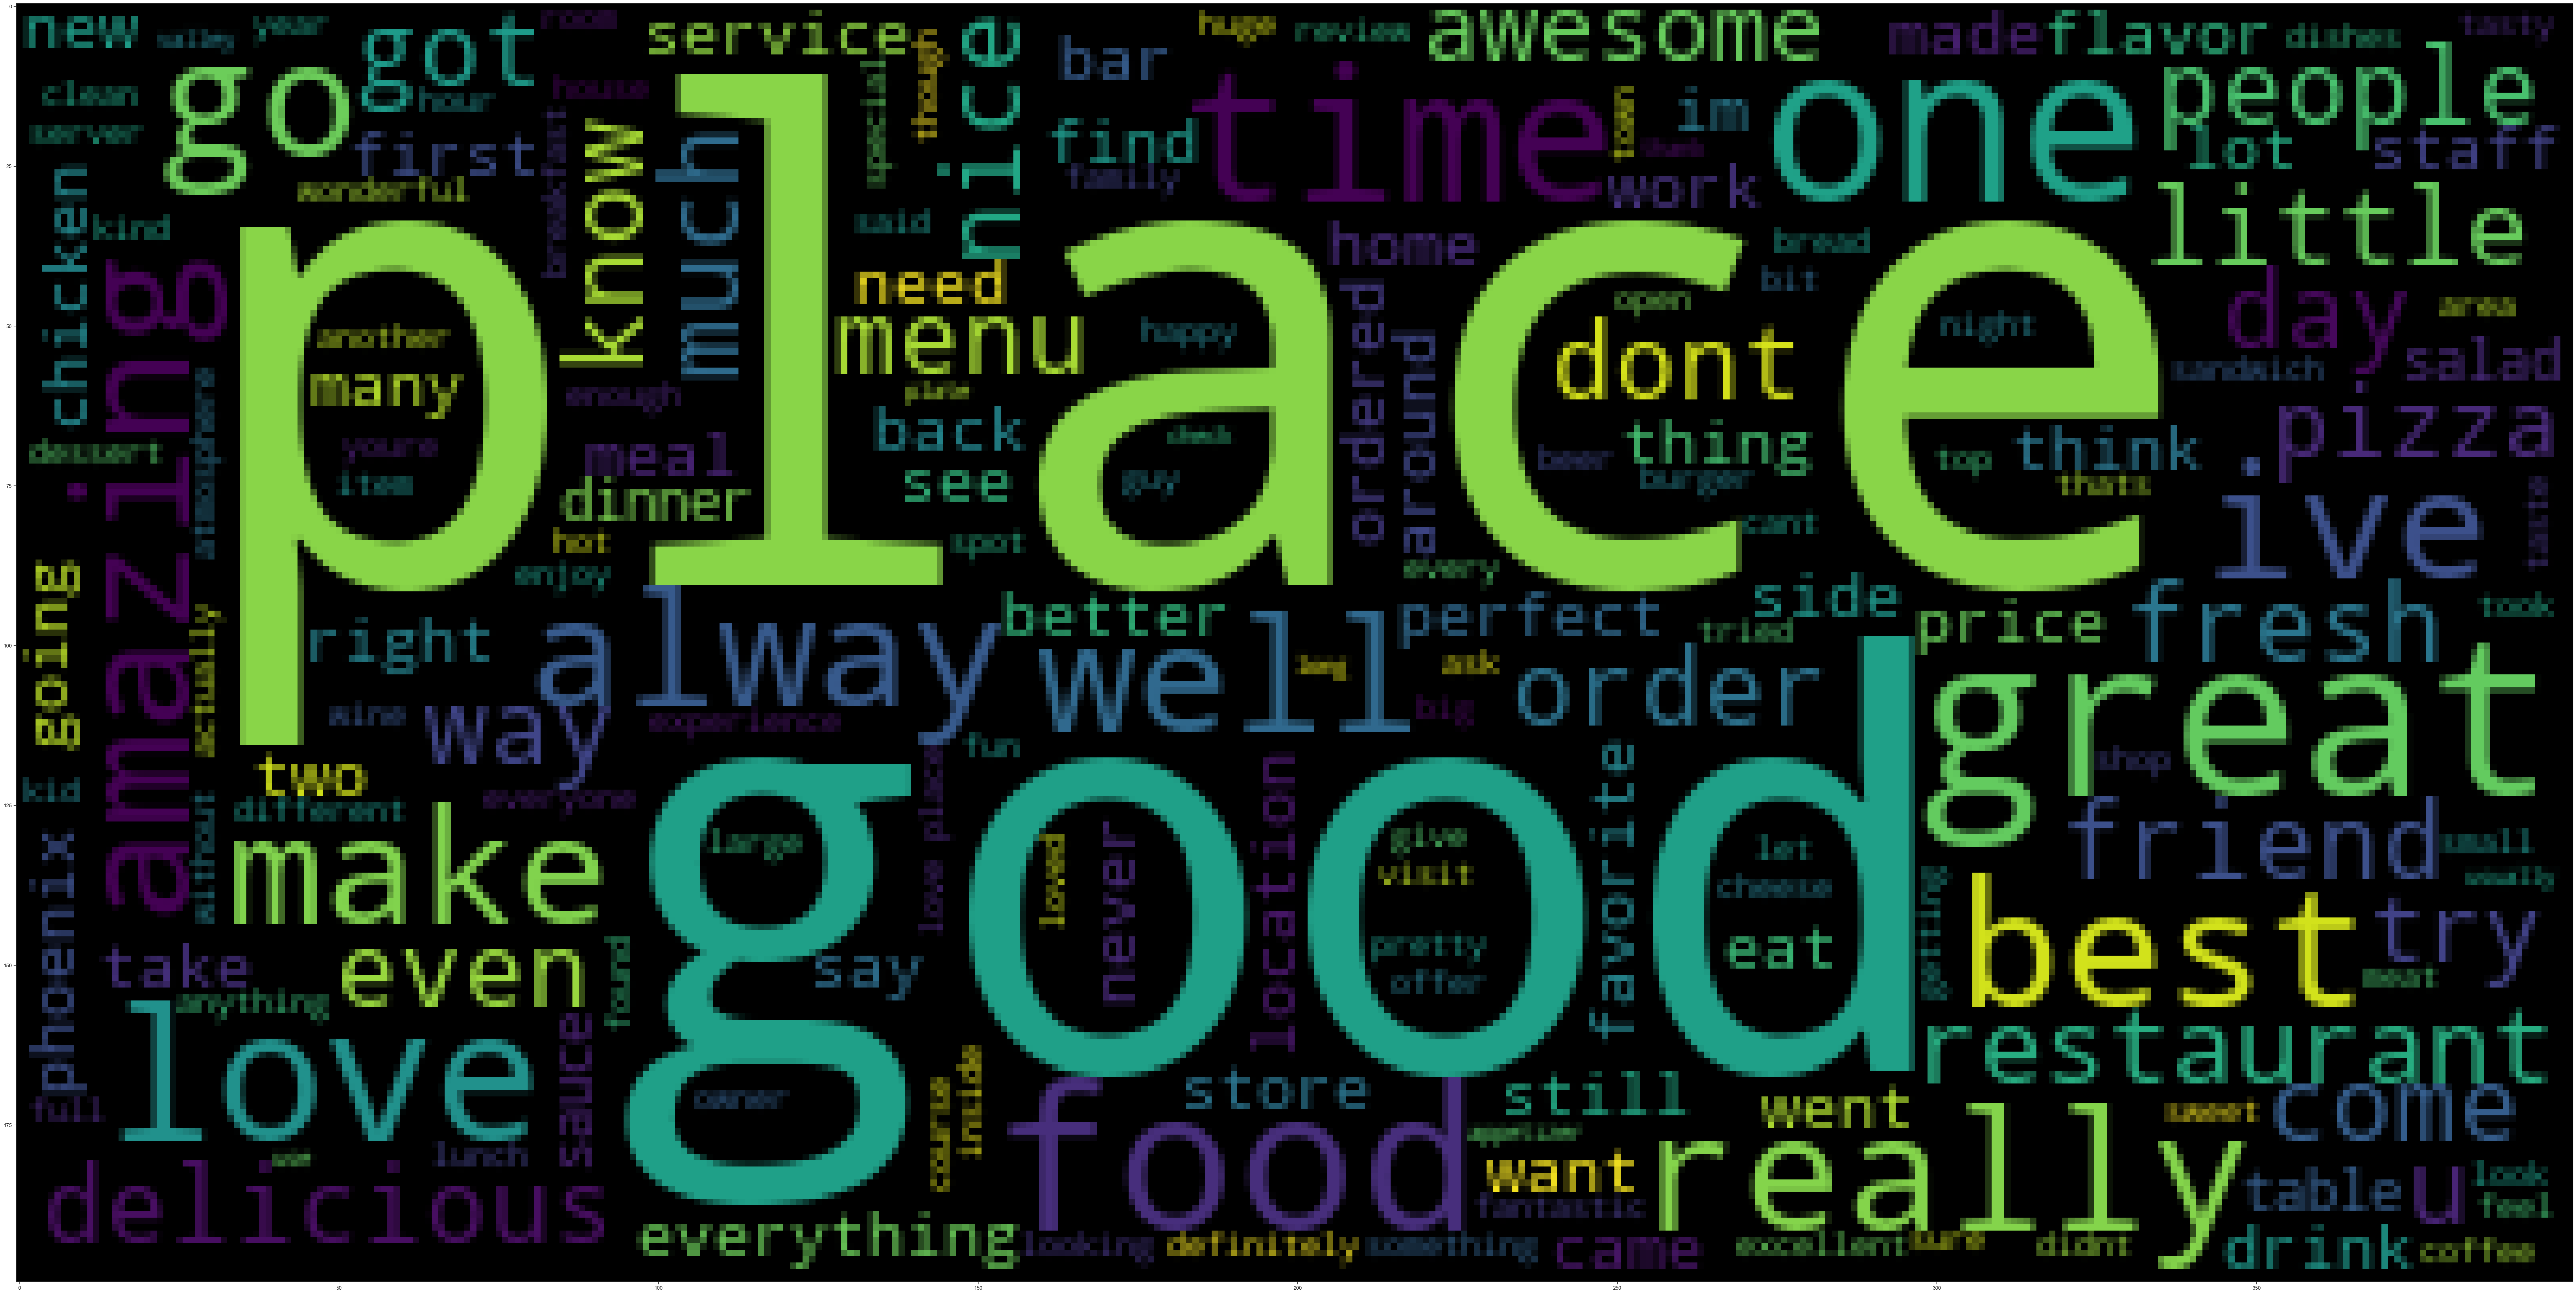

In [317]:
wc = WordCloud().generate(' '.join(positive_ratings.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wc)

In [318]:
# the size of the tokens in word cloud depends on the correlation of tokens with y variable

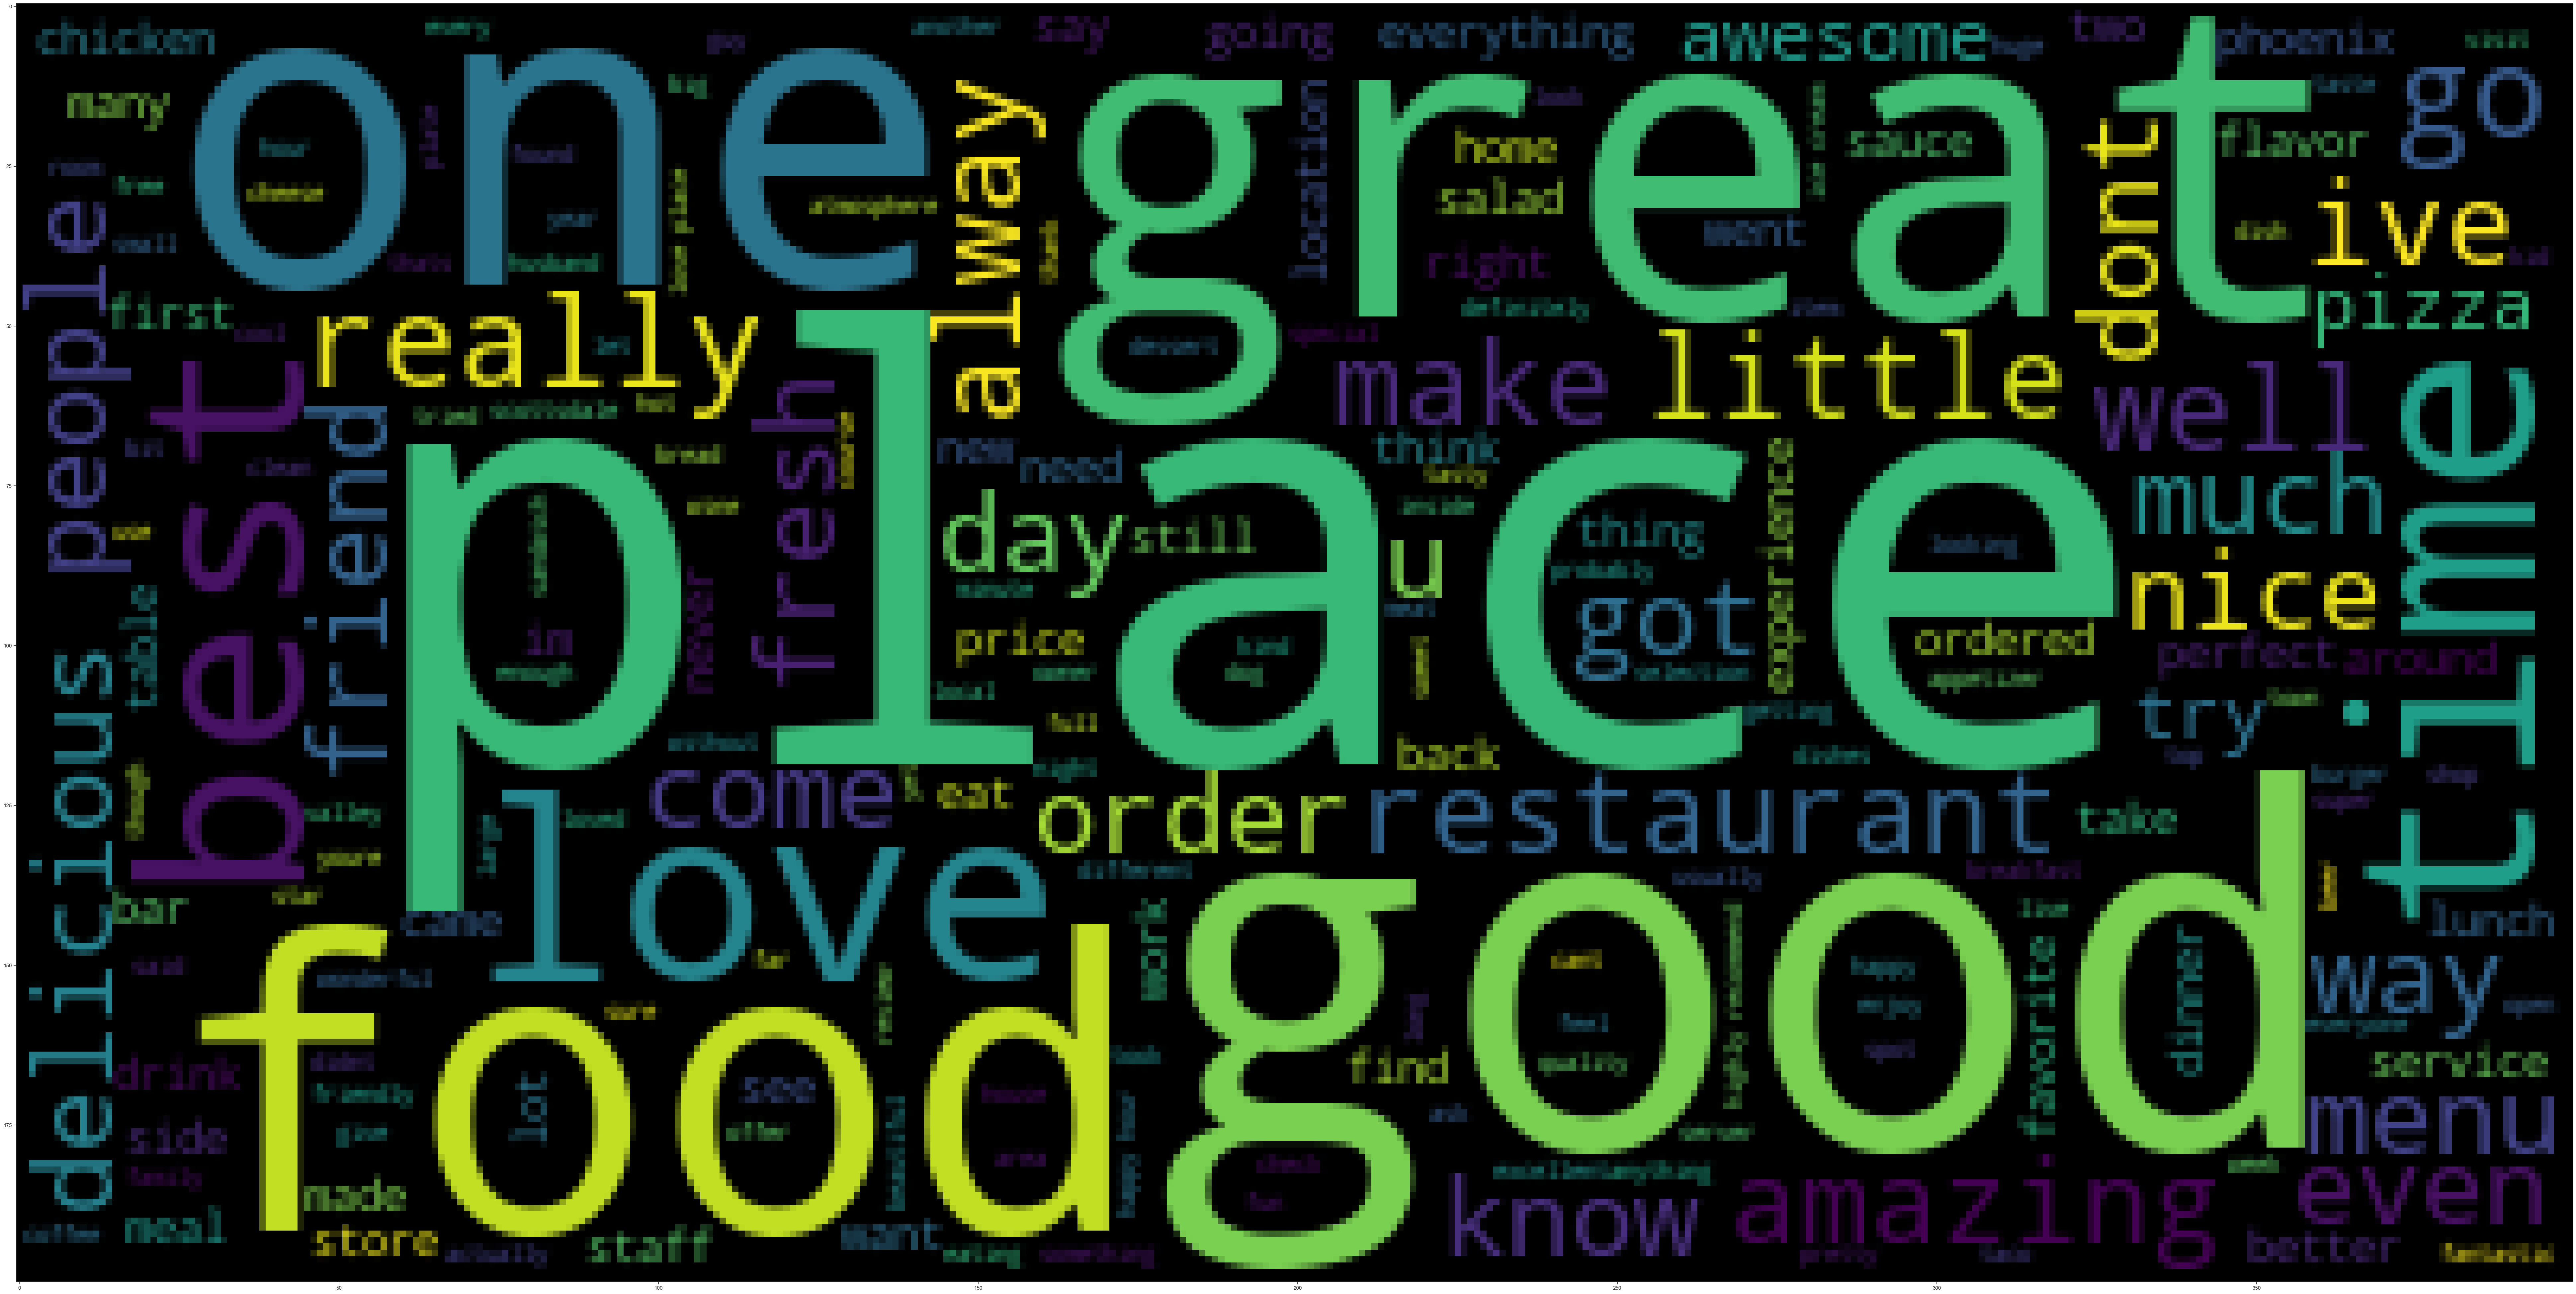

In [319]:
wc = WordCloud(stopwords = STOPWORDS).generate(' '.join(positive_ratings.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wc)

In [320]:
stop1 = list(STOPWORDS) + ['place','one','got','make', 'little', 'dont']
stop1

['yourselves',
 'and',
 'for',
 'http',
 "aren't",
 'or',
 'its',
 'above',
 'same',
 'down',
 'own',
 'he',
 "hasn't",
 'it',
 'ours',
 'to',
 "i'm",
 'out',
 'our',
 "i'll",
 'before',
 'as',
 'would',
 'also',
 'being',
 "he's",
 'them',
 'yourself',
 'itself',
 'could',
 'do',
 'did',
 'over',
 "couldn't",
 'herself',
 'few',
 'until',
 "they've",
 'else',
 'any',
 "it's",
 'so',
 "shouldn't",
 'while',
 'between',
 'ourselves',
 'himself',
 'these',
 'off',
 'have',
 'she',
 'has',
 'be',
 "we'd",
 'were',
 'is',
 "isn't",
 'how',
 "he'll",
 'too',
 "we're",
 'with',
 "can't",
 'because',
 "there's",
 'was',
 'when',
 'than',
 'i',
 'you',
 'yours',
 'shall',
 'about',
 "i've",
 "you'll",
 "who's",
 'however',
 "he'd",
 'most',
 'their',
 'themselves',
 'against',
 'www',
 'those',
 "shan't",
 'r',
 'who',
 "haven't",
 'an',
 "she'll",
 "didn't",
 'of',
 'other',
 "they'll",
 'why',
 "hadn't",
 'during',
 "how's",
 'further',
 'only',
 'been',
 'had',
 'get',
 'me',
 'through',
 '

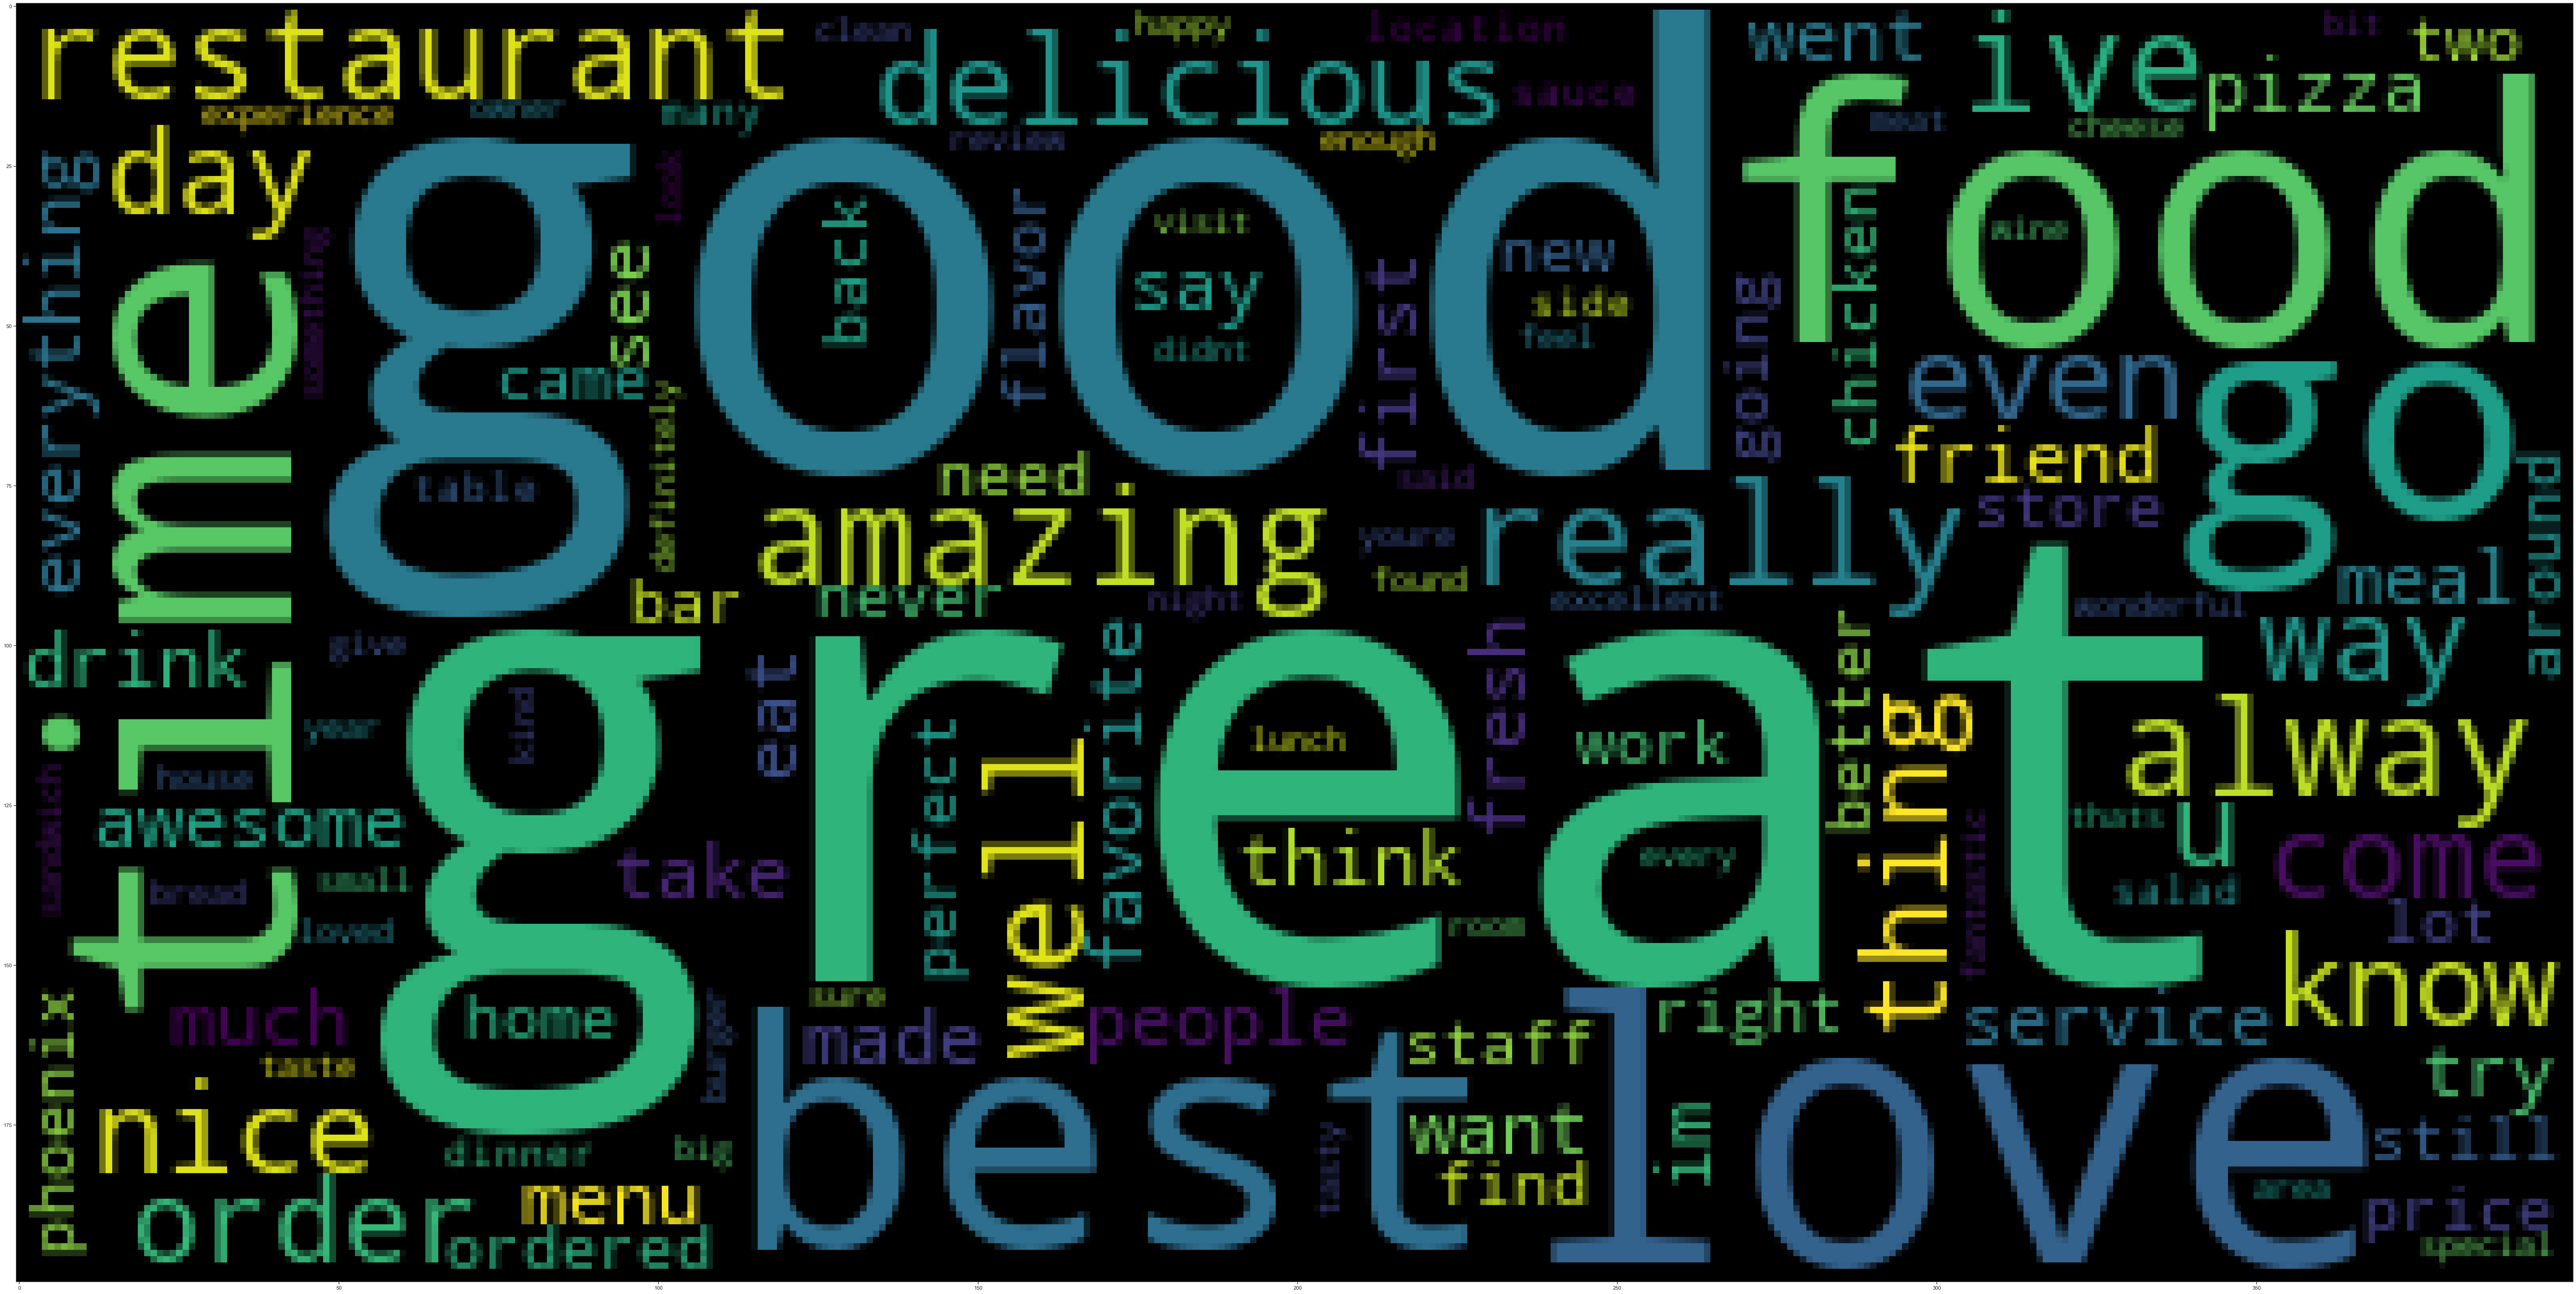

In [321]:
wc = WordCloud(stopwords = stop1).generate(' '.join(positive_ratings.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wc)

In [322]:
negative_ratings = df_1[df_1.stars == 1].cleaned_review

In [323]:
negative_ratings.head(10)

23    u go n check car u wanna buy thats wrong move ...
31    disgusting groupon daughter tried outdated gau...
35    ive eaten many times none bad last nightservic...
61    always fan burlingtons deals however shopping ...
64    another night meeting friends laugh waited ano...
65    busy took nearly min get meal ordered trout sh...
71    yikes reading reviews realize bad experience w...
79    first year participating arizona sell clothing...
84    really cant believe place received high review...
89    really excited event maybe expectations high r...
Name: cleaned_review, dtype: object

In [324]:
' '.join(negative_ratings.tolist())

'u go n check car u wanna buy thats wrong move u even want car service u made biggest mistake ur life time asked girlfriend take car oil service guess ripped girlfriend lying bad car without fixing problem might bring serious accident said brand new tires timing belt new brake pads u know whys worst changed months trashy dealer people better go somewhere disgusting groupon daughter tried outdated gaudy style interior made feel like episode sopranos food pretty bad ordered pretty simple dishes flavor trying im positive good reviews employees owners creating ive eaten many times none bad last nightservice excellent highly attentivefood absolutely horriblemy expectation would serve steak par seafood charging bucks ribeye hoping thick steak cooked pittsburgh style ordered got thick piece meat mostly fat gristle way resembled pittsburgh style salad similar something could get chick filetveggies blahbread basket ample day old certainly wasnt fresh addition bad food crammed small room nuts bu

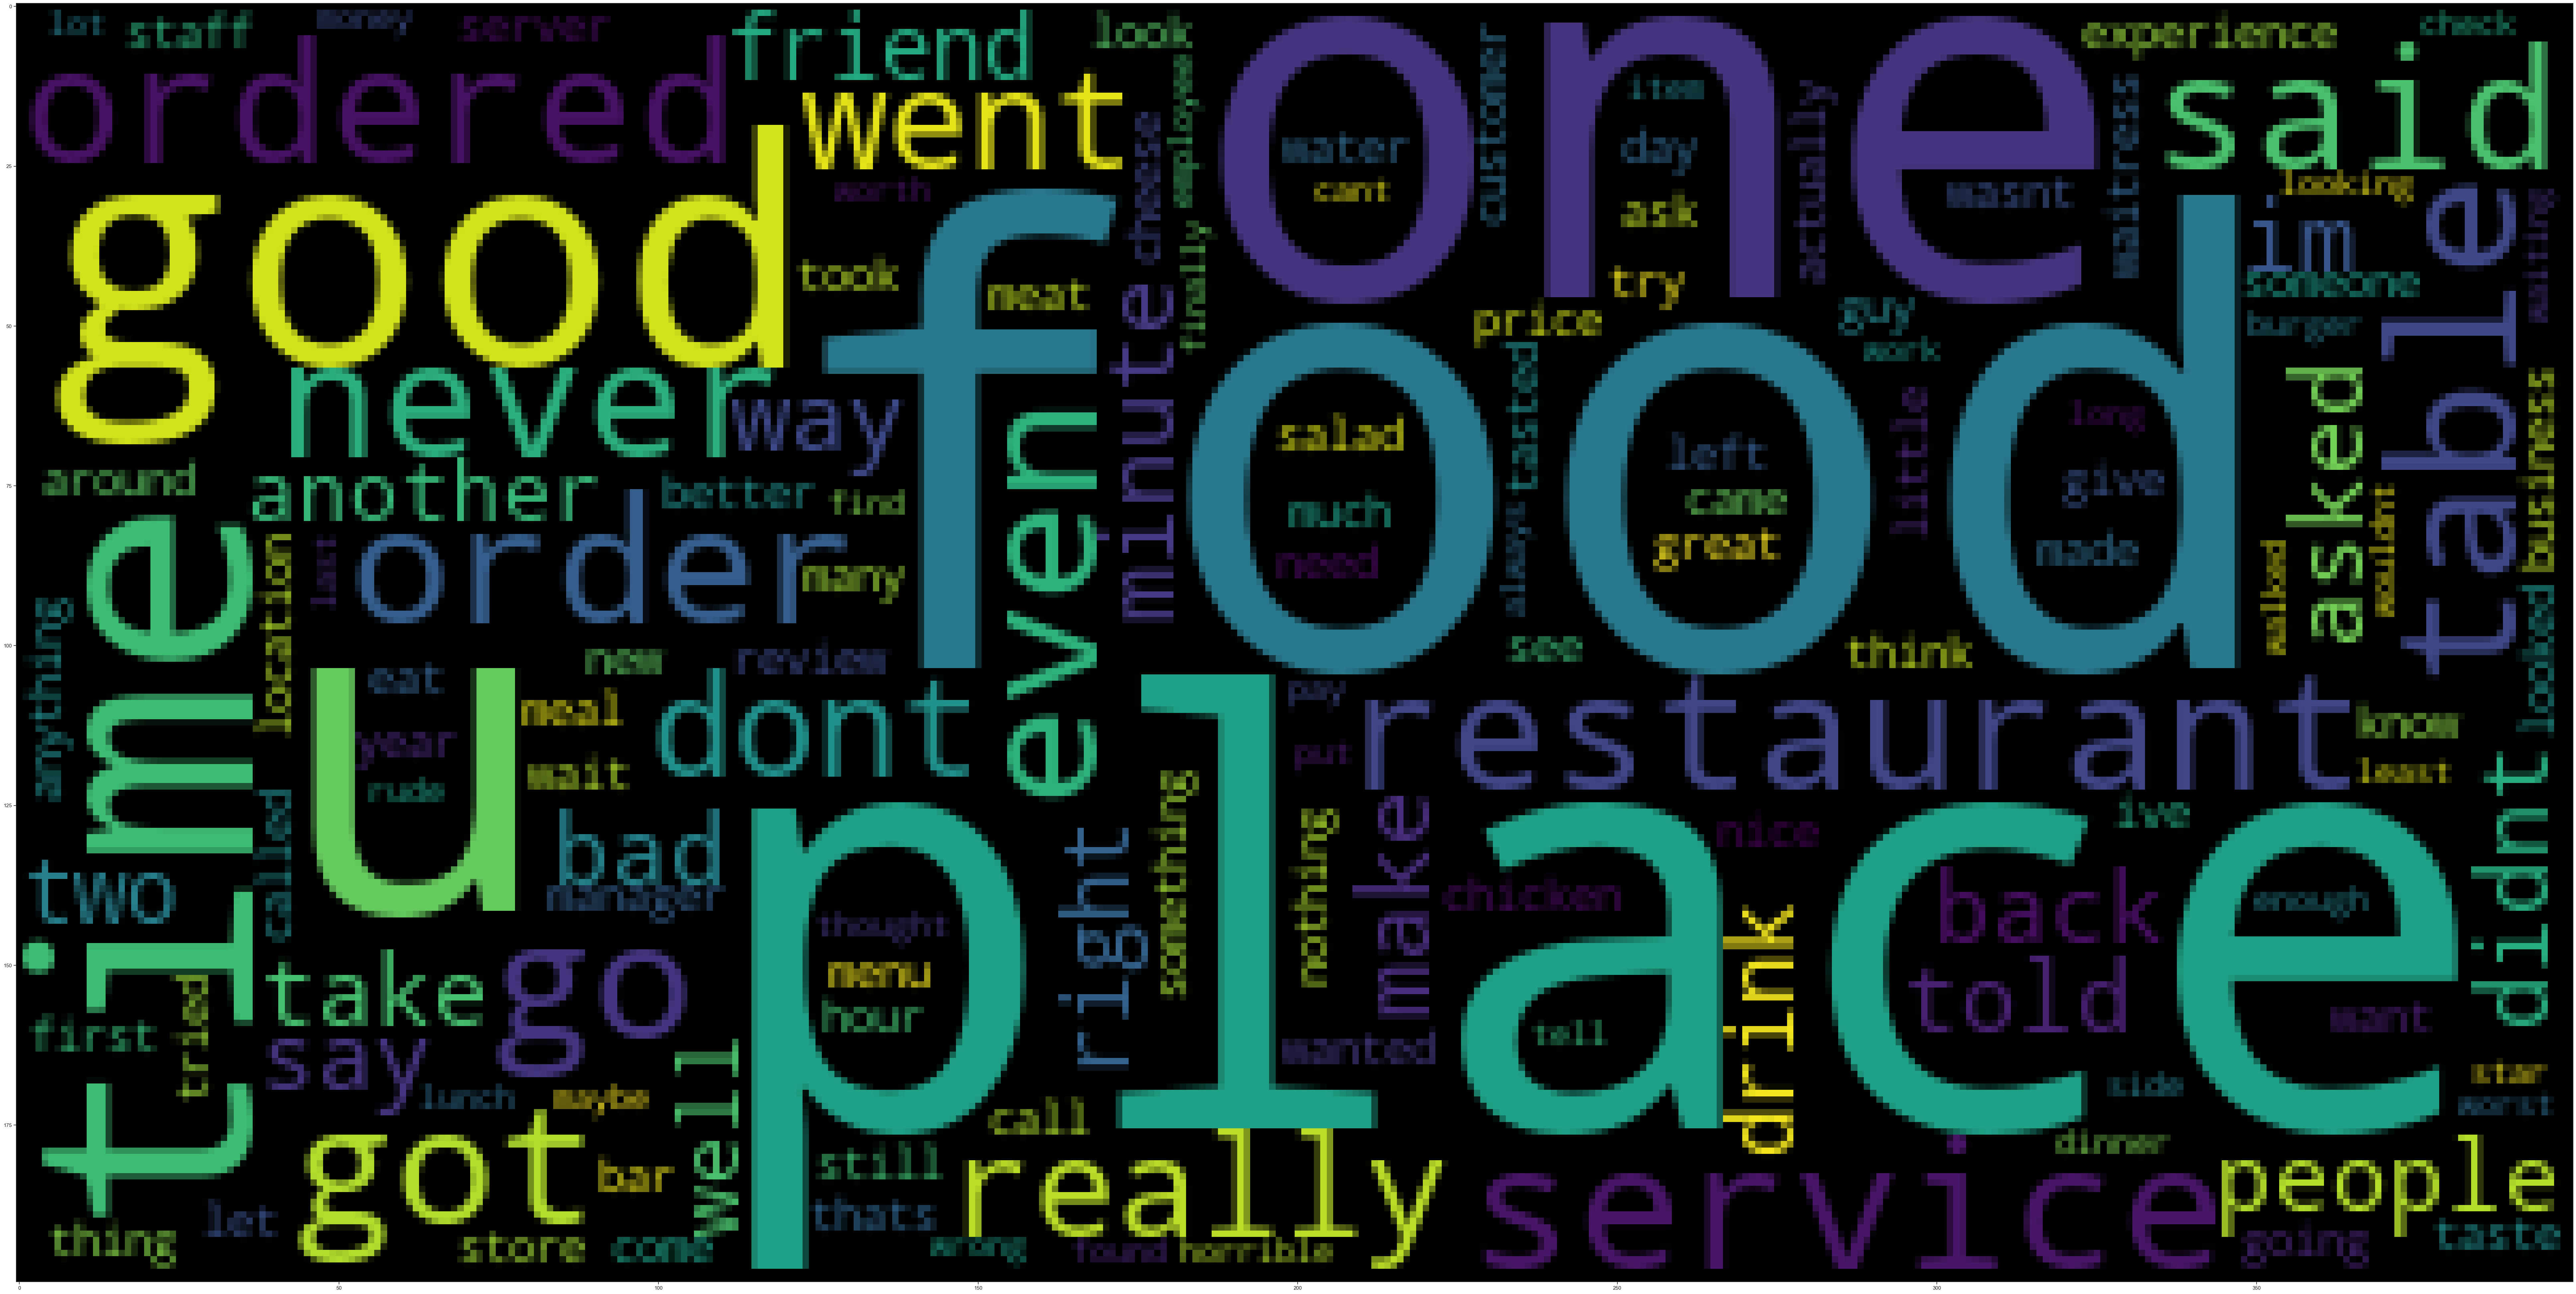

In [325]:
wc = WordCloud(stopwords = STOPWORDS).generate(' '.join(negative_ratings.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wc)

In [326]:
stop2 = list(STOPWORDS) + ['good', 'one', 'went', 'said', 'told', 'even', 'dont','make','anything', 'well','take', 'back']
stop2

['yourselves',
 'and',
 'for',
 'http',
 "aren't",
 'or',
 'its',
 'above',
 'same',
 'down',
 'own',
 'he',
 "hasn't",
 'it',
 'ours',
 'to',
 "i'm",
 'out',
 'our',
 "i'll",
 'before',
 'as',
 'would',
 'also',
 'being',
 "he's",
 'them',
 'yourself',
 'itself',
 'could',
 'do',
 'did',
 'over',
 "couldn't",
 'herself',
 'few',
 'until',
 "they've",
 'else',
 'any',
 "it's",
 'so',
 "shouldn't",
 'while',
 'between',
 'ourselves',
 'himself',
 'these',
 'off',
 'have',
 'she',
 'has',
 'be',
 "we'd",
 'were',
 'is',
 "isn't",
 'how',
 "he'll",
 'too',
 "we're",
 'with',
 "can't",
 'because',
 "there's",
 'was',
 'when',
 'than',
 'i',
 'you',
 'yours',
 'shall',
 'about',
 "i've",
 "you'll",
 "who's",
 'however',
 "he'd",
 'most',
 'their',
 'themselves',
 'against',
 'www',
 'those',
 "shan't",
 'r',
 'who',
 "haven't",
 'an',
 "she'll",
 "didn't",
 'of',
 'other',
 "they'll",
 'why',
 "hadn't",
 'during',
 "how's",
 'further',
 'only',
 'been',
 'had',
 'get',
 'me',
 'through',
 '

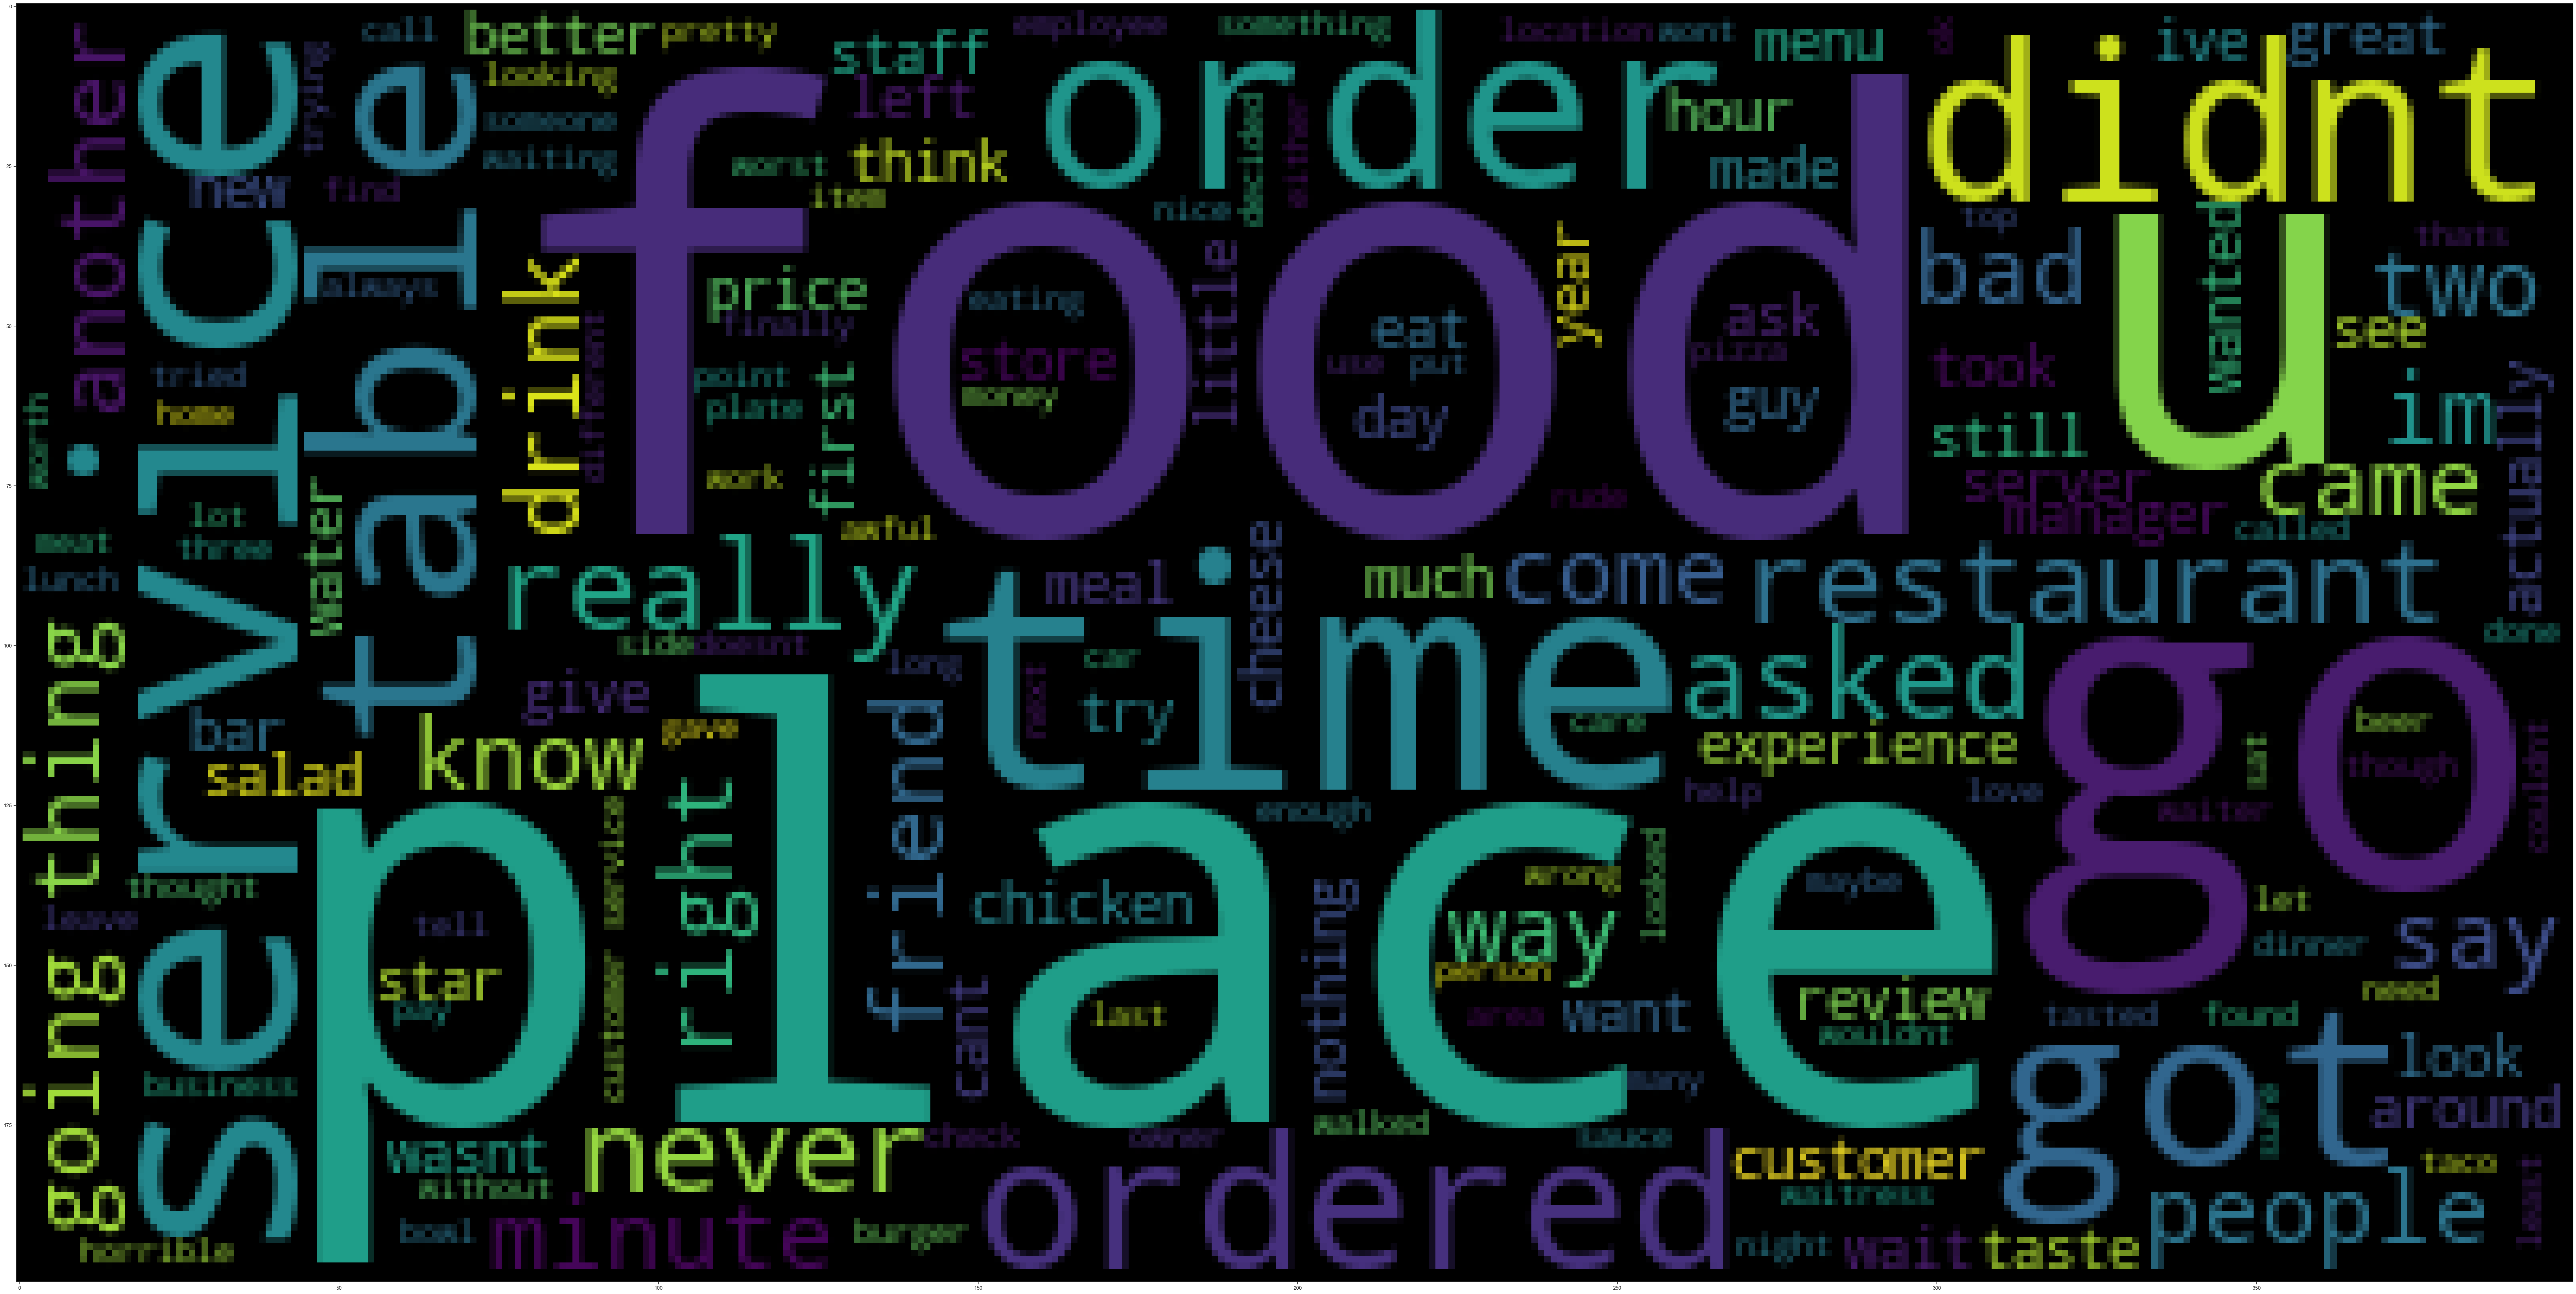

In [327]:
wc = WordCloud(stopwords = stop2).generate(' '.join(negative_ratings.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wc)

In [328]:
df_1.head()

,stars,word_count,unique_word_count,sentences,no_of_paragraphs,no_of_numerics,count_letters,count_punctuations,alphanumeric,noun_count,...,pron_count,sentiment_score,cleaned_review,cleaned_sentiment_score,cleaned_review_length,cleaned_review_words,cleaned_review_unique_words,new_sentiment_Negative,new_sentiment_Neutral,new_sentiment_Positive
0,5,155,110,12,4,1,889,21,135,0,...,0,0.402,wife took birthday breakfast excellent weather...,0.429,570,80,71,0,0,1
1,5,257,159,17,3,0,1345,36,227,0,...,0,0.230,idea people give bad reviews place goes show p...,0.170,740,115,86,0,1,0
2,4,16,16,2,1,0,76,3,14,0,...,0,0.567,love gyro plate rice good also dig candy selec...,0.600,50,9,9,0,0,1
3,5,76,61,5,3,0,419,18,60,0,...,0,0.609,rosie dakota love chaparral dog park convenien...,0.567,285,43,40,0,0,1
4,5,86,72,6,2,0,469,38,69,0,...,0,0.468,general manager scott petello good egg go deta...,0.379,266,41,39,0,0,1


# Vectorization

In [329]:
final_cleaned_review = df_1['cleaned_review'].to_list()

In [347]:
stars = df_1.stars

In [348]:
stars.head()

0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64

In [350]:
df_1 = df_1.drop(columns = 'stars')

In [227]:
len(final_cleaned_review)

10000

In [352]:
tfidf_vect = TfidfVectorizer(lowercase = False,stop_words = 'english',max_features = 10000)
tfidf_vect.fit(final_cleaned_review)
Review_tfidf_vect = tfidf_vect.transform(final_cleaned_review)
Review_vector_tfid = pd.DataFrame(Review_tfidf_vect.todense(), columns = tfidf_vect.get_feature_names_out())
Review_vector_tfid['Review'] = final_cleaned_review
Review_vector_tfid

,aa,aaron,ab,abacus,abandoned,abilities,ability,able,abode,abouti,...,zone,zoo,zoyo,ztejas,zucca,zucchini,zuchinni,zumba,zuzu,Review
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wife took birthday breakfast excellent weather...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,idea people give bad reviews place goes show p...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,love gyro plate rice good also dig candy selec...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rosie dakota love chaparral dog park convenien...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,general manager scott petello good egg go deta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,first visithad lunch today used groupon ordere...
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,called house deliciousnessi could go item item...
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,recently visited olive ivy business last week ...
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nephew moved scottsdale recently bunch friends...


In [351]:
df_1.columns

Index(['word_count', 'unique_word_count', 'sentences', 'no_of_paragraphs',
       'no_of_numerics', 'count_letters', 'count_punctuations', 'alphanumeric',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'sentiment_score', 'cleaned_review', 'cleaned_sentiment_score',
       'cleaned_review_length', 'cleaned_review_words',
       'cleaned_review_unique_words', 'new_sentiment_Negative',
       'new_sentiment_Neutral', 'new_sentiment_Positive'],
      dtype='object')

In [353]:
df_2 = Review_vector_tfid.copy()

In [354]:
df_2 = df_2.drop(columns = 'Review')

In [355]:
df_2.shape

(10000, 10000)

In [356]:
df_2['Ratings'] = stars

# Feature Engineering - Feature Elimination

In [357]:
corr = df_2.corrwith(df_2.stars).abs().sort_values(ascending = False).head(50)

In [358]:
# cutoff = 0.04

In [359]:
v = corr[corr >= 0.04]

In [360]:
v

stars              1.000000
reason             0.125914
giving             0.118717
warrants           0.098064
survey             0.089483
abroad             0.087196
chicks             0.087060
based              0.082012
douchebags         0.081695
star               0.079516
holly              0.071852
given              0.071220
pannini            0.070948
rating             0.070220
fivestar           0.068033
kindof             0.066288
caliber            0.065845
deserves           0.064312
coolness           0.063195
prob               0.063040
bubble             0.062242
uniqueness         0.061643
oily               0.061205
trunk              0.058797
suprised           0.057644
updating           0.057315
gave               0.057188
obriens            0.056757
gets               0.056556
teppanyaki         0.055367
cliff              0.054237
forgotten          0.054006
drool              0.053980
instruction        0.053647
pat                0.053572
limited            0

In [361]:
final_data = df_2[v.index]

In [362]:
final_data.head()

,stars,reason,giving,warrants,survey,abroad,chicks,based,douchebags,star,...,im,rounded,rate,cleanliness,appears,slivers,meltinyourmouth,relative,macadamia,albacore
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting into Training and Testing Datasets

In [367]:
y = final_data['Ratings']

In [368]:
y.head()

0    5
1    5
2    4
3    5
4    5
Name: Ratings, dtype: int64

In [373]:
x = df_2.columns.difference(['Ratings'])

In [374]:
X = df_2[x]

In [375]:
X.head()

,aa,aaron,ab,abacus,abandoned,abilities,ability,able,abode,abouti,...,zoes,zone,zoo,zoyo,ztejas,zucca,zucchini,zuchinni,zumba,zuzu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
